<div style="background-color: #1e1e1e; padding: 30px; border-radius: 15px; border-top: 5px solid #d4af37;">
    <h1 style="color: #d4af37; font-family: 'Consolas', monospace; text-align: center; font-size: 2.5em;">📈 BMW Stock Analysis</h1>
    <h2 style="color: #ffffff; font-family: 'Consolas', monospace; text-align: center;">Advanced Technical Analysis & Machine Learning Forecasting</h2>
    <hr style="border: 2px solid #d4af37; margin: 20px 0;">
    <div style="display: flex; justify-content: space-around; margin-top: 20px;">
        <div style="text-align: center;">
            <h3 style="color: #00e676; margin: 0;">28 Years</h3>
            <p style="color: #cccccc; margin: 5px 0;">Historical Data</p>
        </div>
        <div style="text-align: center;">
            <h3 style="color: #2979ff; margin: 0;">7,212 Days</h3>
            <p style="color: #cccccc; margin: 5px 0;">Trading Records</p>
        </div>
        <div style="text-align: center;">
            <h3 style="color: #ffd600; margin: 0;">R² > 0.97</h3>
            <p style="color: #cccccc; margin: 5px 0;">ML Accuracy</p>
        </div>
    </div>
    <p style="color: #b0bec5; text-align: center; margin-top: 20px; font-style: italic;">Comprehensive analysis from 1996 to 2024</p>
</div>

In [12]:
from IPython.display import HTML

HTML('<div style="text-align: center;"><img src="BMW_Stock_Pulse.png" width="500" height="500"></div>')

## 📚 Table of Contents

1. [Setup & Imports](#setup)
2. [Data Loading & Overview](#data)
3. [Exploratory Data Analysis](#eda)
4. [Technical Indicators](#indicators)
5. [Interactive Visualizations](#visualizations)
6. [Machine Learning Forecasting](#ml)
7. [Results & Insights](#results)

---

<a id='setup'></a>
## 1. Setup & Imports

Installing and importing all required libraries for data analysis, visualization, and machine learning.

In [1]:
# Core data manipulation
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Statistical analysis
from scipy import stats

# Settings
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 150

print("[OK] All libraries imported successfully!")

[OK] All libraries imported successfully!


<a id='data'></a>
## 2. Data Loading & Overview

Loading the BMW stock dataset and performing initial exploration.

In [25]:
# Load dataset
df = pd.read_csv('BMW_Data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

print(f"Dataset loaded: {len(df)} trading days from {df.index.min().date()} to {df.index.max().date()}")
print(f"\nShape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")

Dataset loaded: 7212 trading days from 1996-11-08 to 2024-12-30

Shape: (7212, 6)

Columns: ['Adj_Close', 'Close', 'High', 'Low', 'Open', 'Volume']


In [26]:
# Display first few rows
df.head(10)

,Adj_Close,Close,High,Low,Open,Volume
Date,,,,,,
1996-11-08,8.100290,18.171000,18.209999,18.171000,18.209999,767000
1996-11-11,8.078445,18.122000,18.200001,18.082001,18.190001,260000
1996-11-12,8.139520,18.259001,18.327999,18.091999,18.160999,1066000
1996-11-13,8.126592,18.230000,18.344000,18.190001,18.344000,793000
1996-11-14,8.152893,18.289000,18.289000,18.132000,18.205000,351000
1996-11-15,8.219315,18.438000,18.440001,18.268999,18.308001,624000
1996-11-18,8.231796,18.466000,18.584000,18.365999,18.372999,624000
1996-11-19,8.266567,18.544001,18.544001,18.313999,18.485001,442000
1996-11-20,8.135953,18.250999,18.603001,18.243000,18.485001,546000


In [27]:
# Basic statistics
df.describe()

,Adj_Close,Close,High,Low,Open,Volume
count,7212.000000,7212.000000,7212.000000,7212.000000,7212.000000,7.212000e+03
mean,36.020199,56.427535,57.111143,55.720695,56.446728,2.107946e+06
std,23.641099,25.245886,25.415148,25.055661,25.252263,1.467180e+06
min,8.065074,17.040001,17.815001,16.000000,17.280001,0.000000e+00
25%,16.443254,34.457500,34.900002,33.887500,34.465001,1.194308e+06
50%,26.329212,49.372501,50.094999,48.752501,49.267500,1.793778e+06
75%,53.329208,79.332500,80.105000,78.342497,79.379997,2.636572e+06
max,108.059044,122.599998,123.750000,120.349998,123.300003,2.871954e+07


In [28]:
# Data quality check
print("Missing Values:")
print(df.isnull().sum())
print(f"\nData Completeness: {(1 - df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")

Missing Values:
Adj_Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

Data Completeness: 100.00%


<a id='eda'></a>
## 3. Exploratory Data Analysis

Comprehensive statistical analysis and visualization of the BMW stock data.

### 3.1 Price Evolution

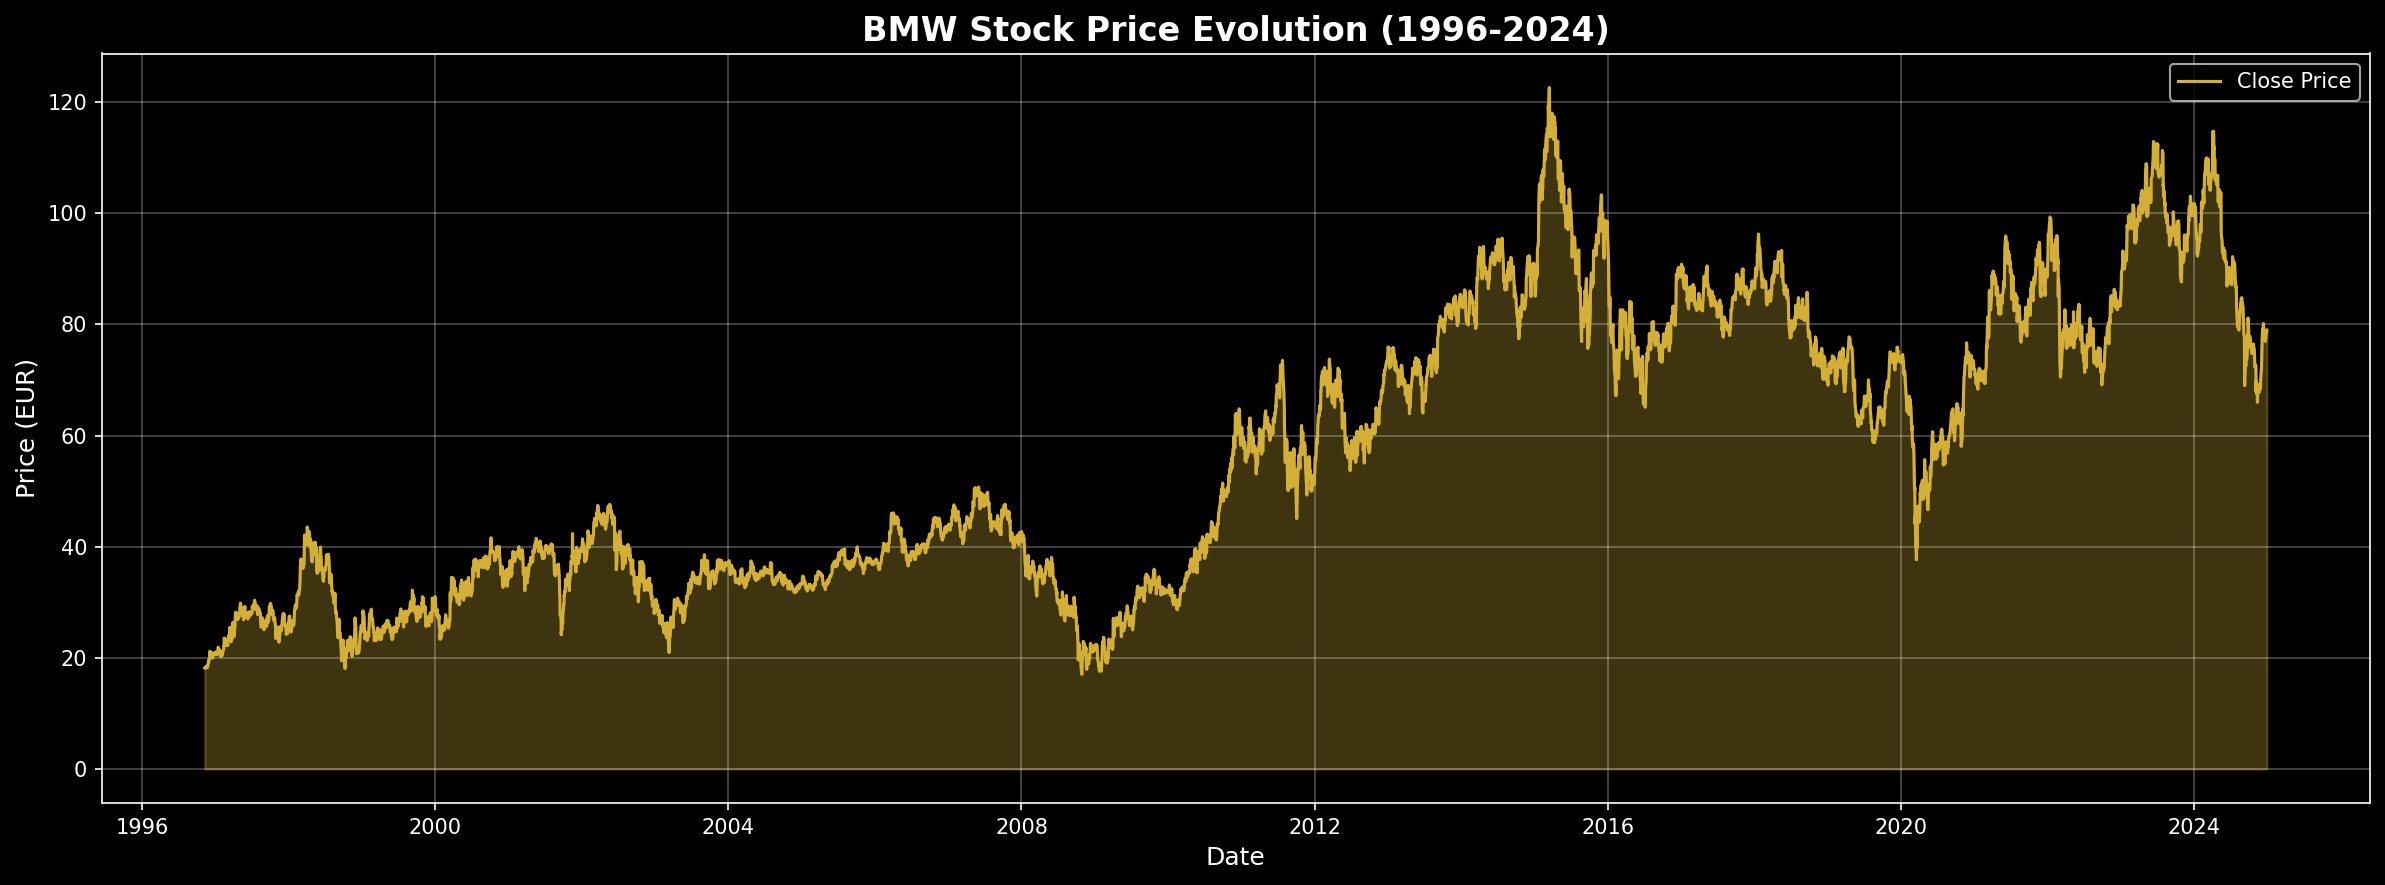

In [29]:
# Simple price chart
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(df.index, df['Close'], linewidth=1.5, color='#d4af37', label='Close Price')
ax.fill_between(df.index, df['Close'], alpha=0.3, color='#d4af37')
ax.set_title('BMW Stock Price Evolution (1996-2024)', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price (EUR)', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 3.2 Returns Analysis

In [30]:
# Calculate returns
df['Daily_Return'] = df['Adj_Close'].pct_change()
df['Log_Return'] = np.log(df['Adj_Close'] / df['Adj_Close'].shift(1))

# Summary statistics
print("Returns Summary:")
print(f"Total Return: {((df['Close'].iloc[-1] / df['Close'].iloc[0]) - 1) * 100:.2f}%")
print(f"CAGR: {((df['Close'].iloc[-1] / df['Close'].iloc[0]) ** (1 / (len(df) / 252)) - 1) * 100:.2f}%")
print(f"Average Daily Return: {df['Daily_Return'].mean() * 100:.3f}%")
print(f"Daily Volatility: {df['Daily_Return'].std() * 100:.3f}%")
print(f"Annualized Volatility: {df['Daily_Return'].std() * np.sqrt(252) * 100:.2f}%")
print(f"Sharpe Ratio: {df['Daily_Return'].mean() / df['Daily_Return'].std() * np.sqrt(252):.2f}")

Returns Summary:
Total Return: 334.65%
CAGR: 5.27%
Average Daily Return: 0.054%
Daily Volatility: 2.114%
Annualized Volatility: 33.56%
Sharpe Ratio: 0.40


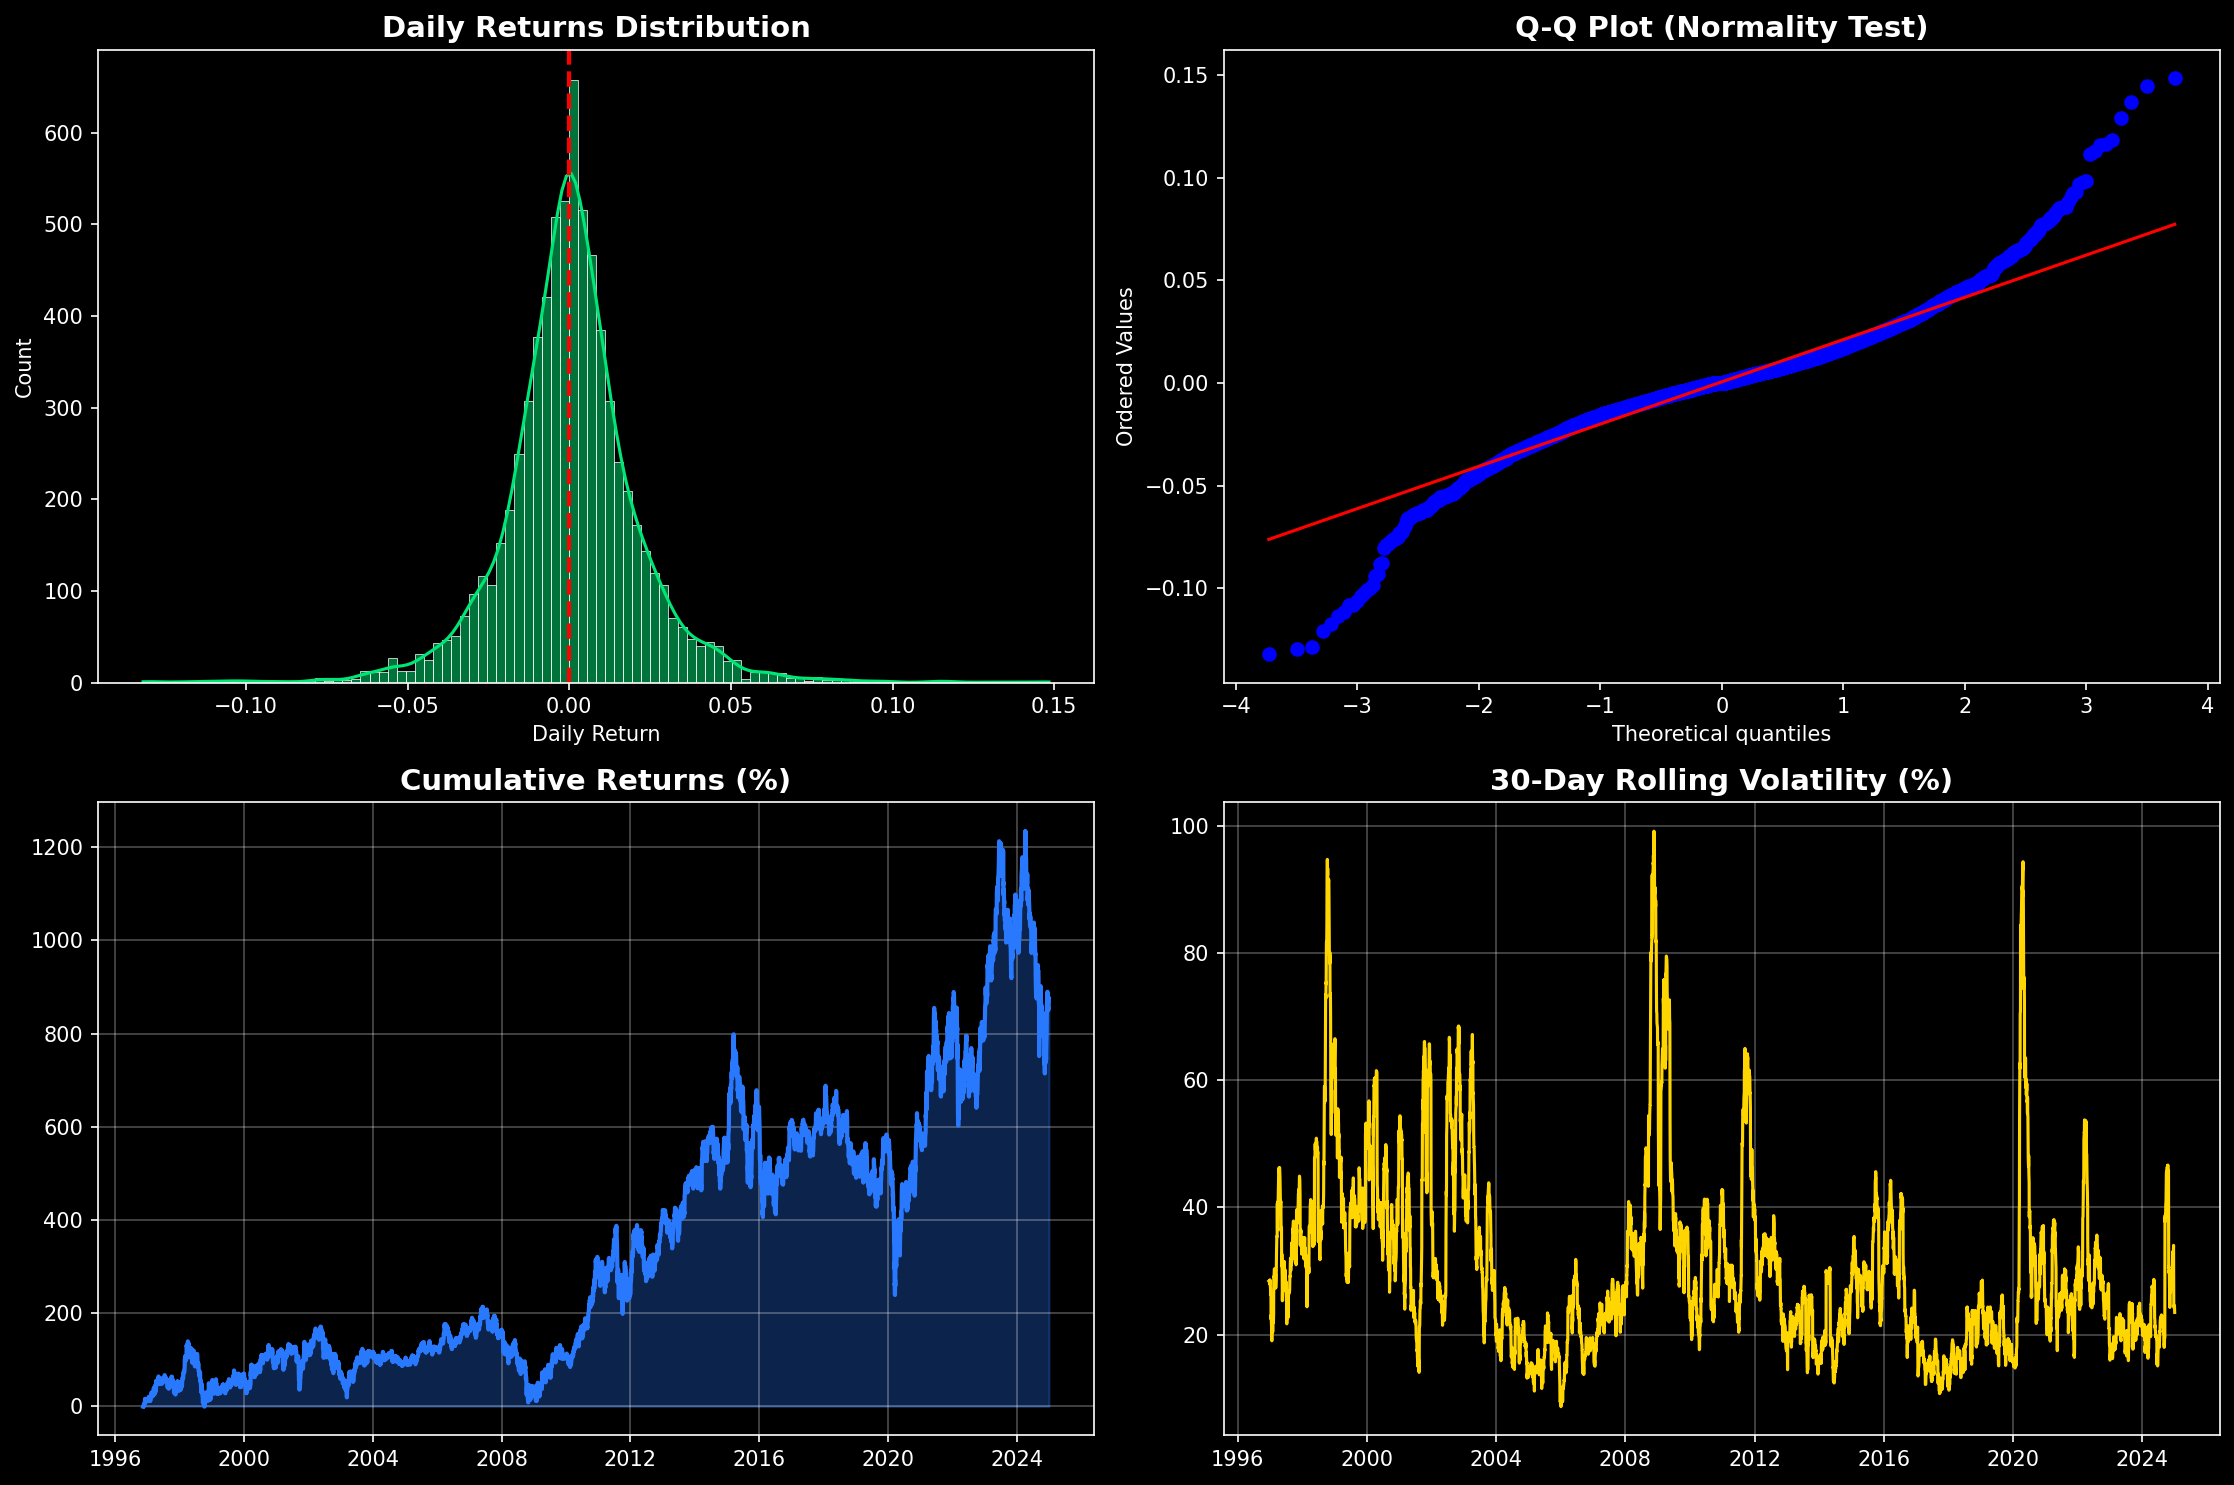

In [31]:
# Returns distribution analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Daily returns histogram
sns.histplot(df['Daily_Return'].dropna(), bins=100, kde=True, ax=axes[0, 0], color='#00e676')
axes[0, 0].set_title('Daily Returns Distribution', fontsize=14, fontweight='bold')
axes[0, 0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Daily Return')

# Q-Q plot
stats.probplot(df['Daily_Return'].dropna(), dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot (Normality Test)', fontsize=14, fontweight='bold')

# Cumulative returns
cumulative_returns = (1 + df['Daily_Return']).cumprod() - 1
axes[1, 0].plot(cumulative_returns.index, cumulative_returns * 100, color='#2979ff', linewidth=2)
axes[1, 0].fill_between(cumulative_returns.index, 0, cumulative_returns * 100, alpha=0.3, color='#2979ff')
axes[1, 0].set_title('Cumulative Returns (%)', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Rolling volatility
rolling_vol = df['Daily_Return'].rolling(window=30).std() * np.sqrt(252) * 100
axes[1, 1].plot(rolling_vol.index, rolling_vol, color='#ffd600', linewidth=1.5)
axes[1, 1].set_title('30-Day Rolling Volatility (%)', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.3 Volume Analysis

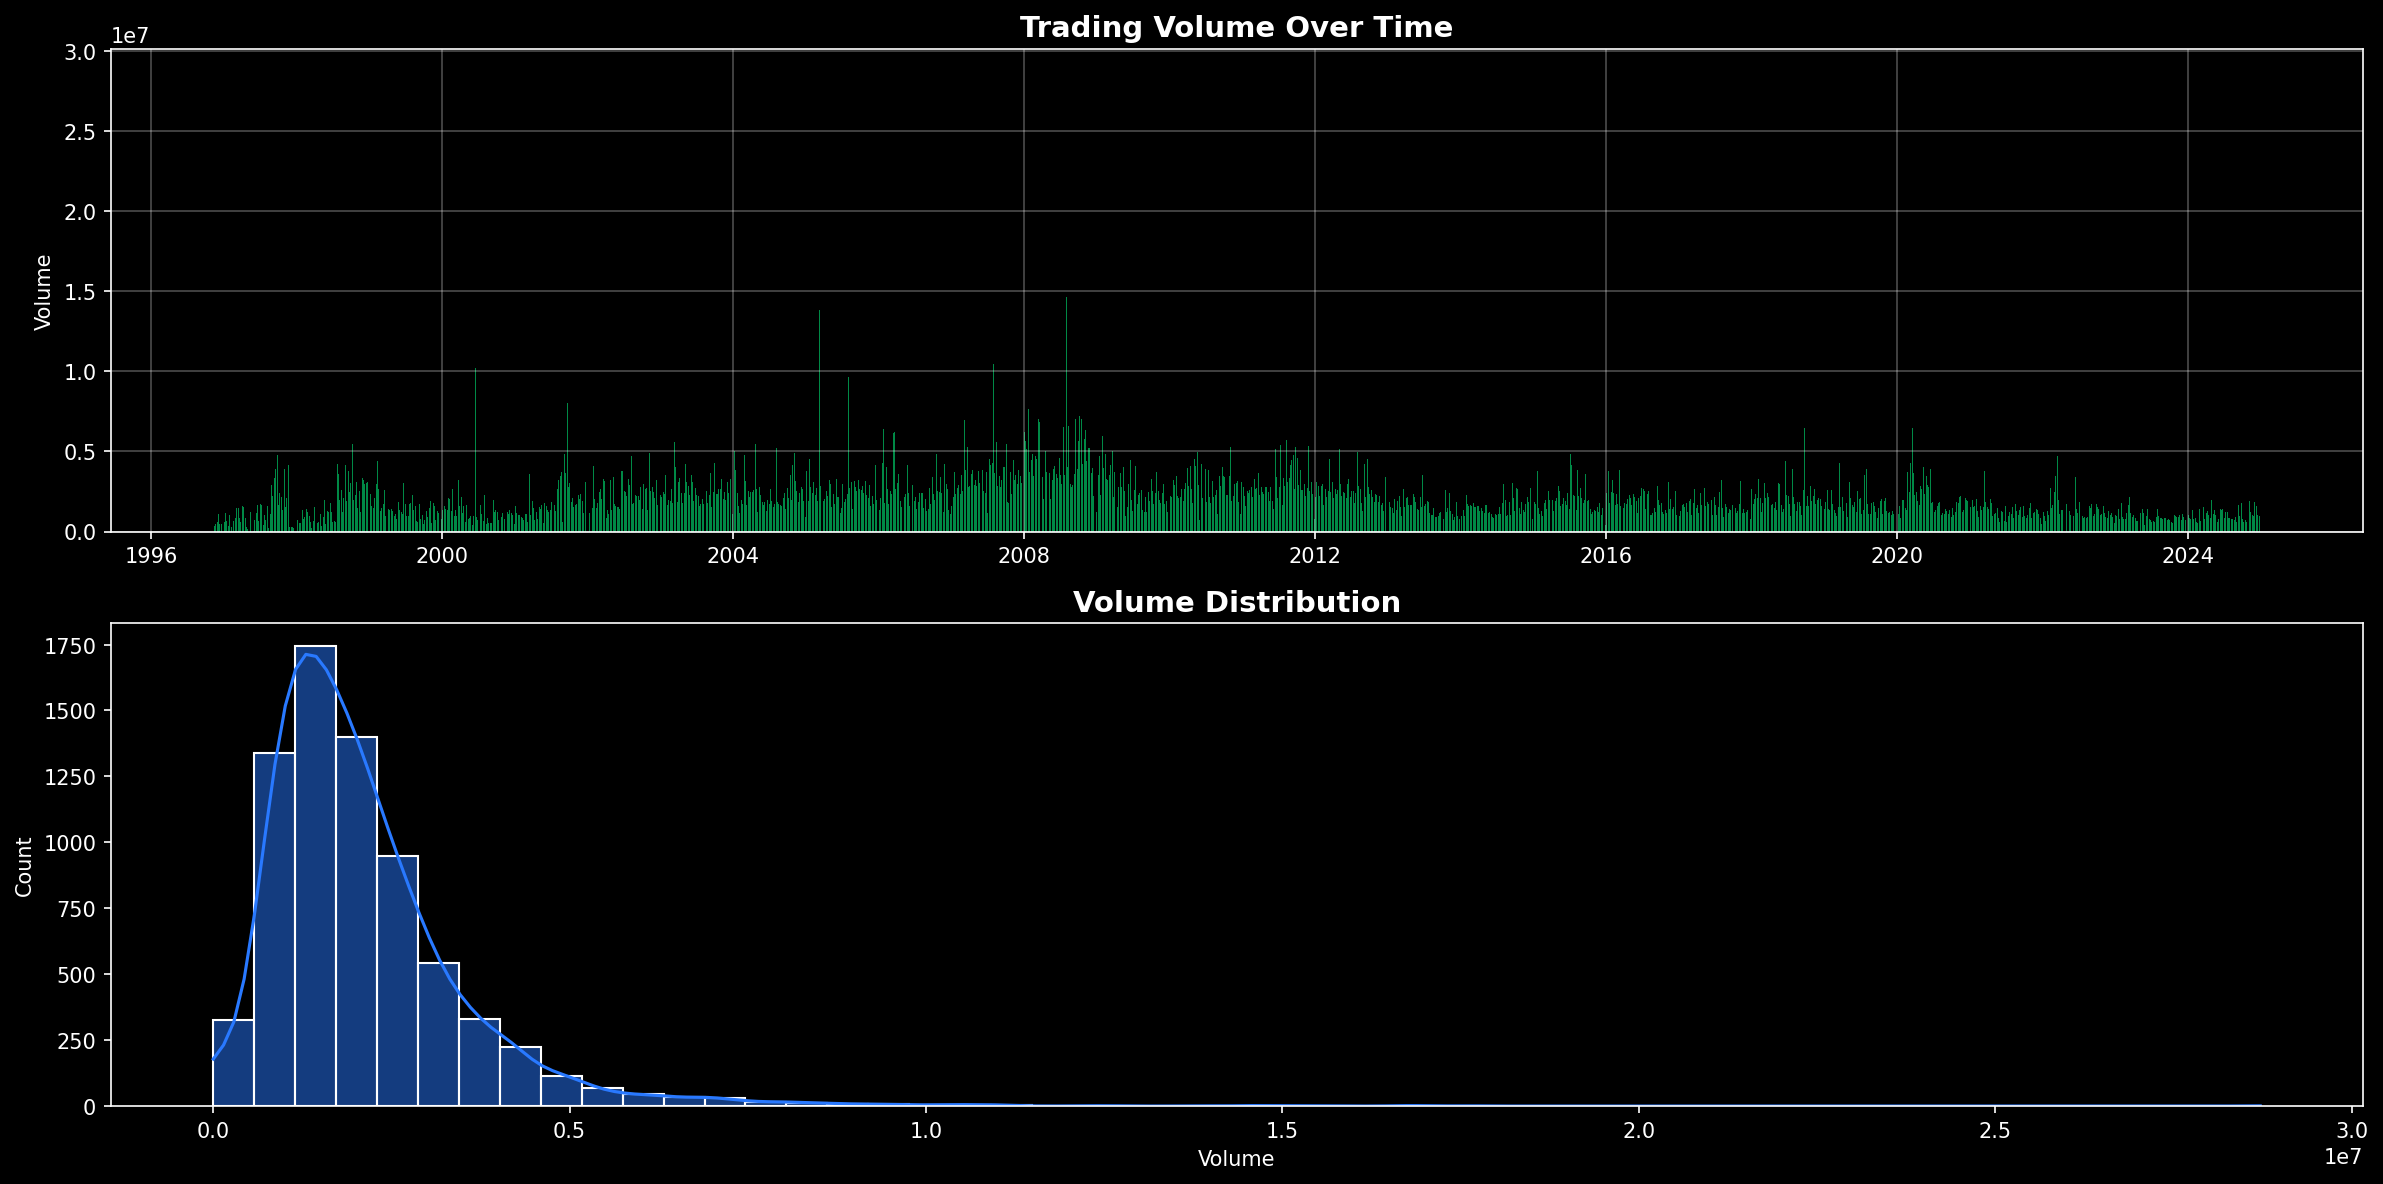

Average Daily Volume: 2,107,946 shares
Maximum Volume: 28,719,542 shares on 2000-03-17


In [32]:
fig, axes = plt.subplots(2, 1, figsize=(16, 8))

# Volume over time
axes[0].bar(df.index, df['Volume'], width=1, color='#00e676', alpha=0.6)
axes[0].set_title('Trading Volume Over Time', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Volume')
axes[0].grid(True, alpha=0.3)

# Volume distribution
sns.histplot(df['Volume'], bins=50, kde=True, ax=axes[1], color='#2979ff')
axes[1].set_title('Volume Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Volume')

plt.tight_layout()
plt.show()

print(f"Average Daily Volume: {df['Volume'].mean():,.0f} shares")
print(f"Maximum Volume: {df['Volume'].max():,.0f} shares on {df['Volume'].idxmax().date()}")

<a id='indicators'></a>
## 4. Technical Indicators

Calculating essential technical indicators for trading analysis.

### 4.1 Moving Averages

In [33]:
# Calculate moving averages
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

print("[OK] Moving averages calculated")

[OK] Moving averages calculated


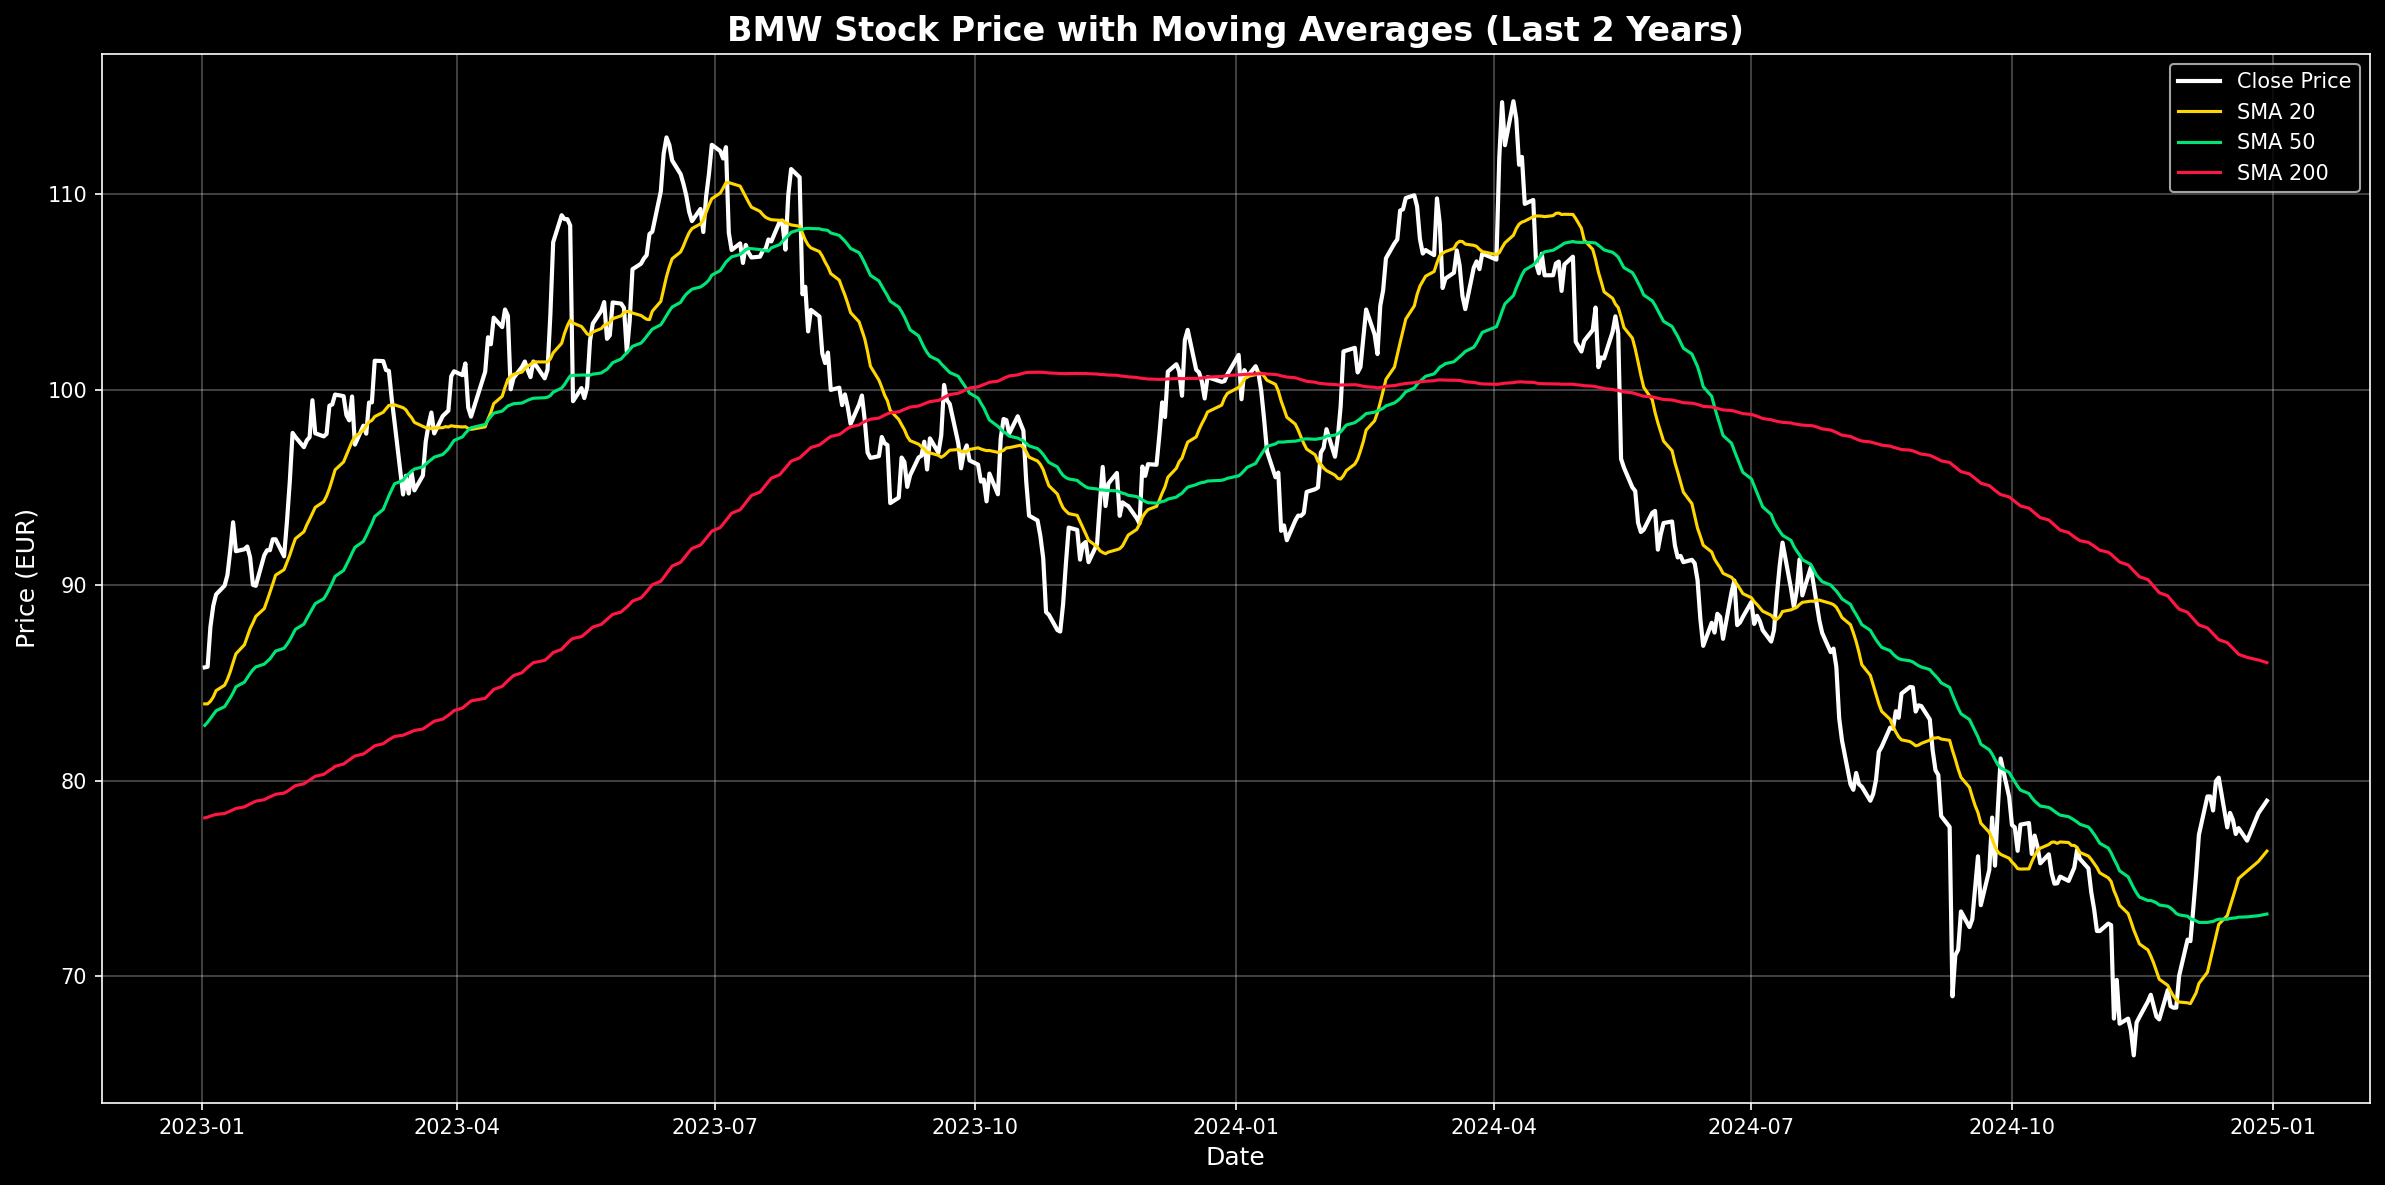

In [34]:
# Plot moving averages
fig, ax = plt.subplots(figsize=(16, 8))

# Plot last 2 years for clarity
recent_data = df.last('2Y')
ax.plot(recent_data.index, recent_data['Close'], label='Close Price', linewidth=2, color='white')
ax.plot(recent_data.index, recent_data['SMA_20'], label='SMA 20', linewidth=1.5, color='#ffd600')
ax.plot(recent_data.index, recent_data['SMA_50'], label='SMA 50', linewidth=1.5, color='#00e676')
ax.plot(recent_data.index, recent_data['SMA_200'], label='SMA 200', linewidth=1.5, color='#ff1744')

ax.set_title('BMW Stock Price with Moving Averages (Last 2 Years)', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price (EUR)', fontsize=12)
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 4.2 RSI (Relative Strength Index)

In [35]:
def calculate_rsi(data, period=14):
    """Calculate RSI indicator"""
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = calculate_rsi(df['Adj_Close'])
print(f"Current RSI: {df['RSI'].iloc[-1]:.2f}")
print("[OK] RSI calculated")

Current RSI: 63.76
[OK] RSI calculated


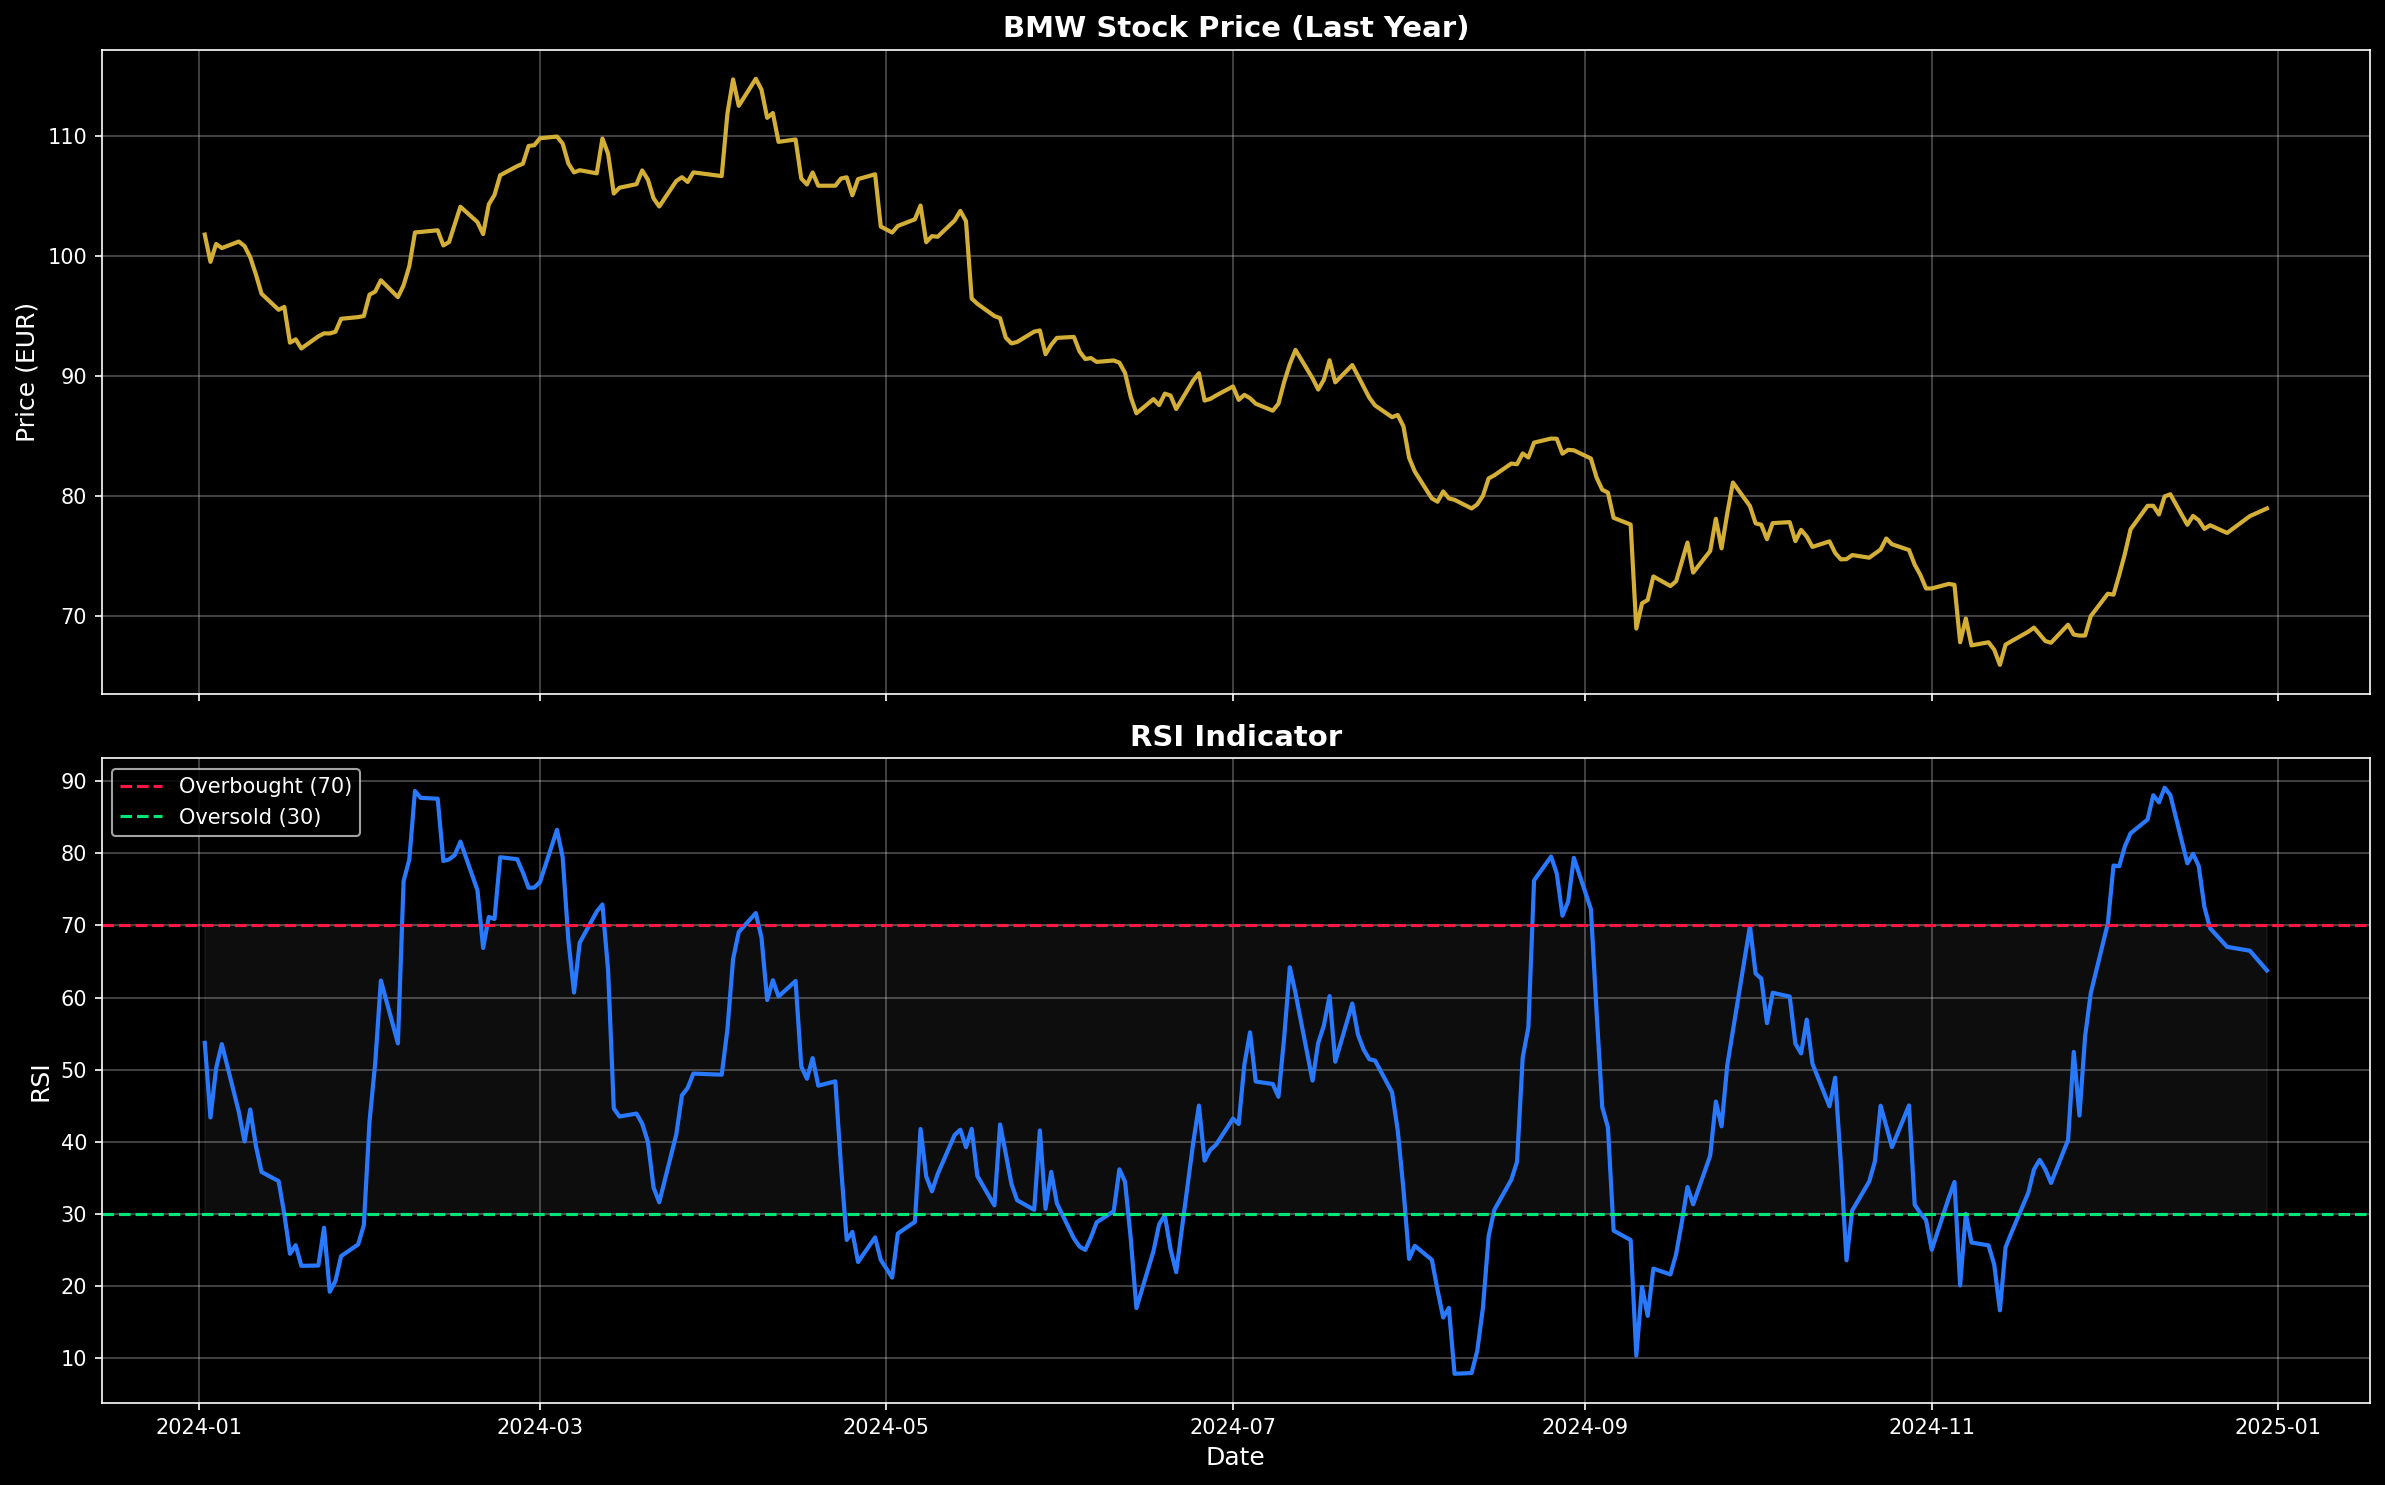

In [36]:
# Plot RSI
fig, axes = plt.subplots(2, 1, figsize=(16, 10), sharex=True)

recent_data = df.last('1Y')

# Price chart
axes[0].plot(recent_data.index, recent_data['Close'], linewidth=2, color='#d4af37')
axes[0].set_title('BMW Stock Price (Last Year)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Price (EUR)', fontsize=12)
axes[0].grid(True, alpha=0.3)

# RSI chart
axes[1].plot(recent_data.index, recent_data['RSI'], linewidth=2, color='#2979ff')
axes[1].axhline(y=70, color='#ff1744', linestyle='--', linewidth=1.5, label='Overbought (70)')
axes[1].axhline(y=30, color='#00e676', linestyle='--', linewidth=1.5, label='Oversold (30)')
axes[1].fill_between(recent_data.index, 30, 70, alpha=0.1, color='gray')
axes[1].set_title('RSI Indicator', fontsize=14, fontweight='bold')
axes[1].set_ylabel('RSI', fontsize=12)
axes[1].set_xlabel('Date', fontsize=12)
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 4.3 MACD (Moving Average Convergence Divergence)

In [37]:
def calculate_macd(data, fast=12, slow=26, signal=9):
    """Calculate MACD indicator"""
    ema_fast = data.ewm(span=fast, adjust=False).mean()
    ema_slow = data.ewm(span=slow, adjust=False).mean()
    macd = ema_fast - ema_slow
    macd_signal = macd.ewm(span=signal, adjust=False).mean()
    return macd, macd_signal

df['MACD'], df['MACD_Signal'] = calculate_macd(df['Close'])
df['MACD_Histogram'] = df['MACD'] - df['MACD_Signal']
print("[OK] MACD calculated")

[OK] MACD calculated


### 4.4 Bollinger Bands

In [38]:
def calculate_bollinger_bands(data, period=20, std_dev=2):
    """Calculate Bollinger Bands"""
    sma = data.rolling(window=period).mean()
    std = data.rolling(window=period).std()
    upper = sma + (std * std_dev)
    lower = sma - (std * std_dev)
    return upper, lower

df['BB_Upper'], df['BB_Lower'] = calculate_bollinger_bands(df['Close'])
print("[OK] Bollinger Bands calculated")

[OK] Bollinger Bands calculated


### 4.5 ATR (Average True Range)

In [39]:
def calculate_atr(df, period=14):
    """Calculate Average True Range"""
    high_low = df['High'] - df['Low']
    high_close = np.abs(df['High'] - df['Close'].shift())
    low_close = np.abs(df['Low'] - df['Close'].shift())
    tr = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    atr = tr.rolling(window=period).mean()
    return atr

df['ATR'] = calculate_atr(df)
print("[OK] ATR calculated")

[OK] ATR calculated


### 4.6 Feature Correlation

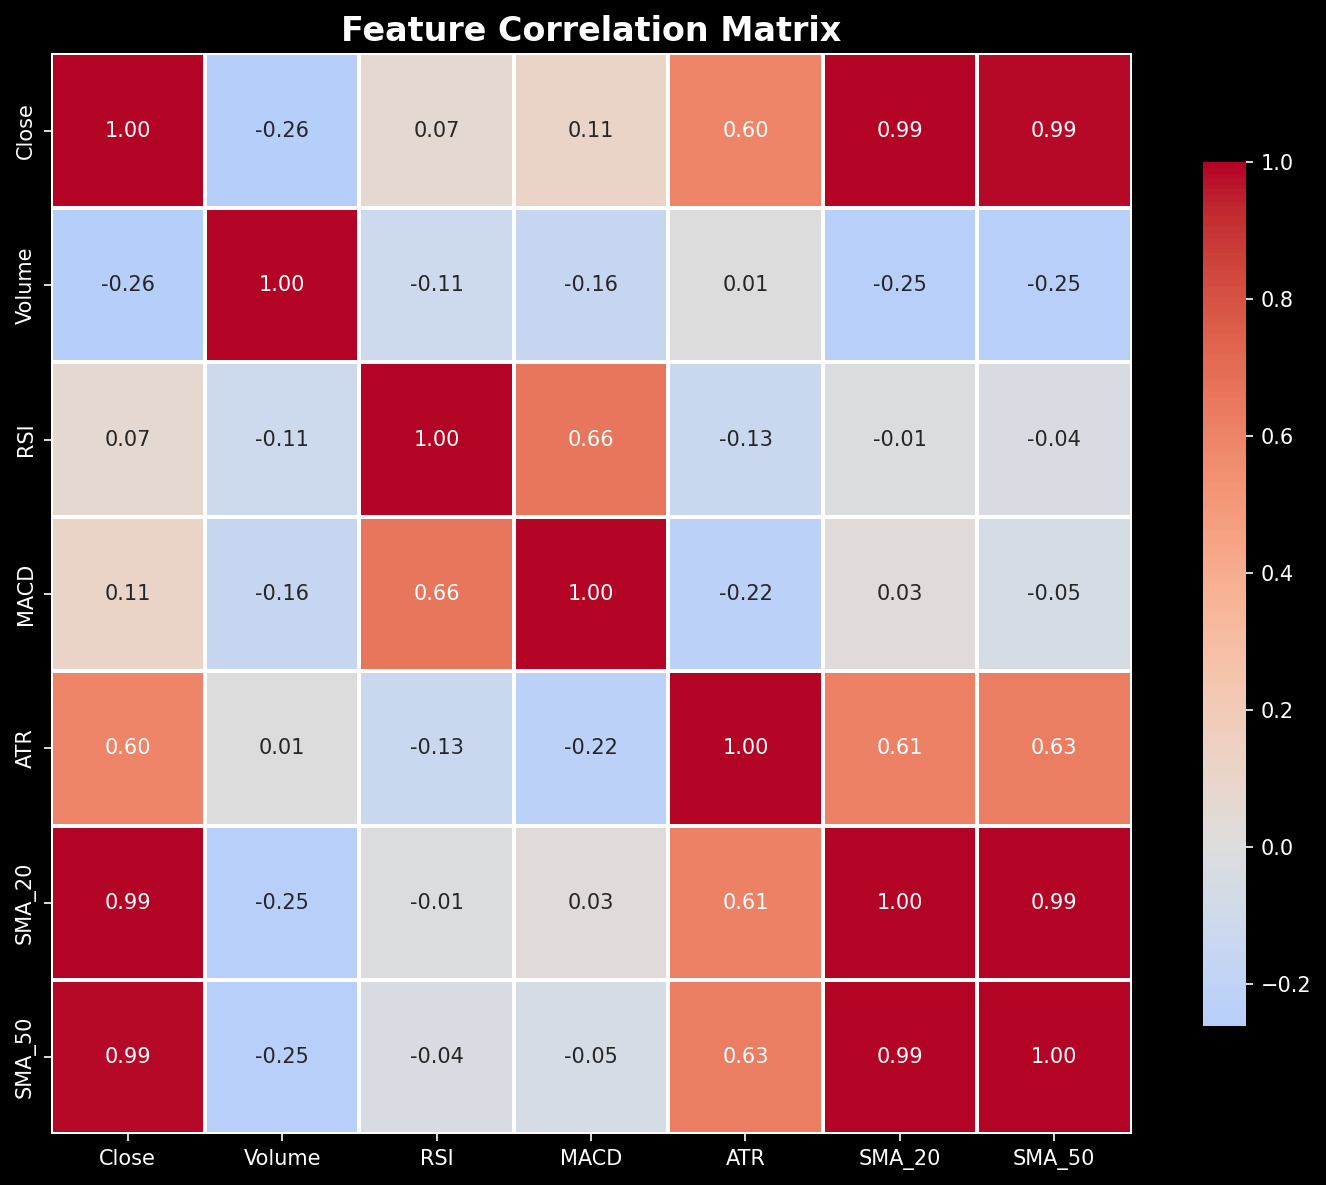

In [40]:
# Correlation heatmap
features = ['Close', 'Volume', 'RSI', 'MACD', 'ATR', 'SMA_20', 'SMA_50']
corr = df[features].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

<a id='visualizations'></a>
## 5. Interactive Visualizations

Creating interactive Plotly charts for in-depth analysis.

### 5.1 Interactive Candlestick Chart

In [41]:
# Prepare data (last 500 days)
data = df.tail(500)

# Create subplots
fig = make_subplots(rows=3, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.03,
                    row_heights=[0.6, 0.2, 0.2],
                    subplot_titles=('BMW Stock Price', 'Volume', 'RSI'))

# Candlestick chart
fig.add_trace(go.Candlestick(
    x=data.index,
    open=data['Open'],
    high=data['High'],
    low=data['Low'],
    close=data['Close'],
    name='Price'
), row=1, col=1)

# Add moving averages
fig.add_trace(go.Scatter(x=data.index, y=data['SMA_20'], 
                         name='SMA 20', line=dict(color='yellow', width=1)), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['SMA_50'], 
                         name='SMA 50', line=dict(color='orange', width=1)), row=1, col=1)

# Volume bars
colors = ['red' if row['Open'] > row['Close'] else 'green' for index, row in data.iterrows()]
fig.add_trace(go.Bar(x=data.index, y=data['Volume'], name='Volume', marker_color=colors),
              row=2, col=1)

# RSI indicator
fig.add_trace(go.Scatter(x=data.index, y=data['RSI'], name='RSI', 
                         line=dict(color='purple', width=2)), row=3, col=1)
fig.add_hline(y=70, line_dash="dash", line_color="red", row=3, col=1)
fig.add_hline(y=30, line_dash="dash", line_color="green", row=3, col=1)

# Update layout
fig.update_layout(
    title='BMW Stock: Interactive Technical Analysis Dashboard',
    xaxis_rangeslider_visible=False,
    height=900,
    template='plotly_dark',
    showlegend=True
)

fig.show()

<a id='ml'></a>
## 6. Machine Learning Forecasting

Building predictive models using Random Forest and Gradient Boosting.

### 6.1 Feature Engineering

In [42]:
# Create lagged features
for lag in [1, 5, 10, 20]:
    df[f'Close_Lag_{lag}'] = df['Close'].shift(lag)

# Volume features
df['Volume_MA_20'] = df['Volume'].rolling(window=20).mean()
df['Volume_Ratio'] = df['Volume'] / df['Volume_MA_20']

print("[OK] Features engineered")

[OK] Features engineered


### 6.2 Model Training

In [43]:
# Prepare features and target
feature_cols = ['Close_Lag_1', 'Close_Lag_5', 'Close_Lag_10', 'Close_Lag_20',
                'SMA_20', 'SMA_50', 'SMA_200', 'RSI', 'MACD', 'ATR', 'Volume_Ratio']

df['Target'] = df['Close'].shift(-1)  # Predict next day's close

# Drop NaN values
ml_data = df[feature_cols + ['Target']].dropna()

X = ml_data[feature_cols]
y = ml_data['Target']

# Time-based split (80% train, 20% test)
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(f"Training set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")

Training set: 5609 samples
Test set: 1403 samples


In [44]:
# Train Random Forest
print("Training Random Forest...")
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest - MAE: {rf_mae:.2f}, RMSE: {rf_rmse:.2f}, R2: {rf_r2:.4f}")

Training Random Forest...
Random Forest - MAE: 1.78, RMSE: 2.37, R2: 0.9766


In [45]:
# Train Gradient Boosting
print("Training Gradient Boosting...")
gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)

gb_pred = gb_model.predict(X_test)
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
gb_r2 = r2_score(y_test, gb_pred)

print(f"Gradient Boosting - MAE: {gb_mae:.2f}, RMSE: {gb_rmse:.2f}, R2: {gb_r2:.4f}")

Training Gradient Boosting...
Gradient Boosting - MAE: 1.76, RMSE: 2.38, R2: 0.9764


### 6.3 Model Evaluation

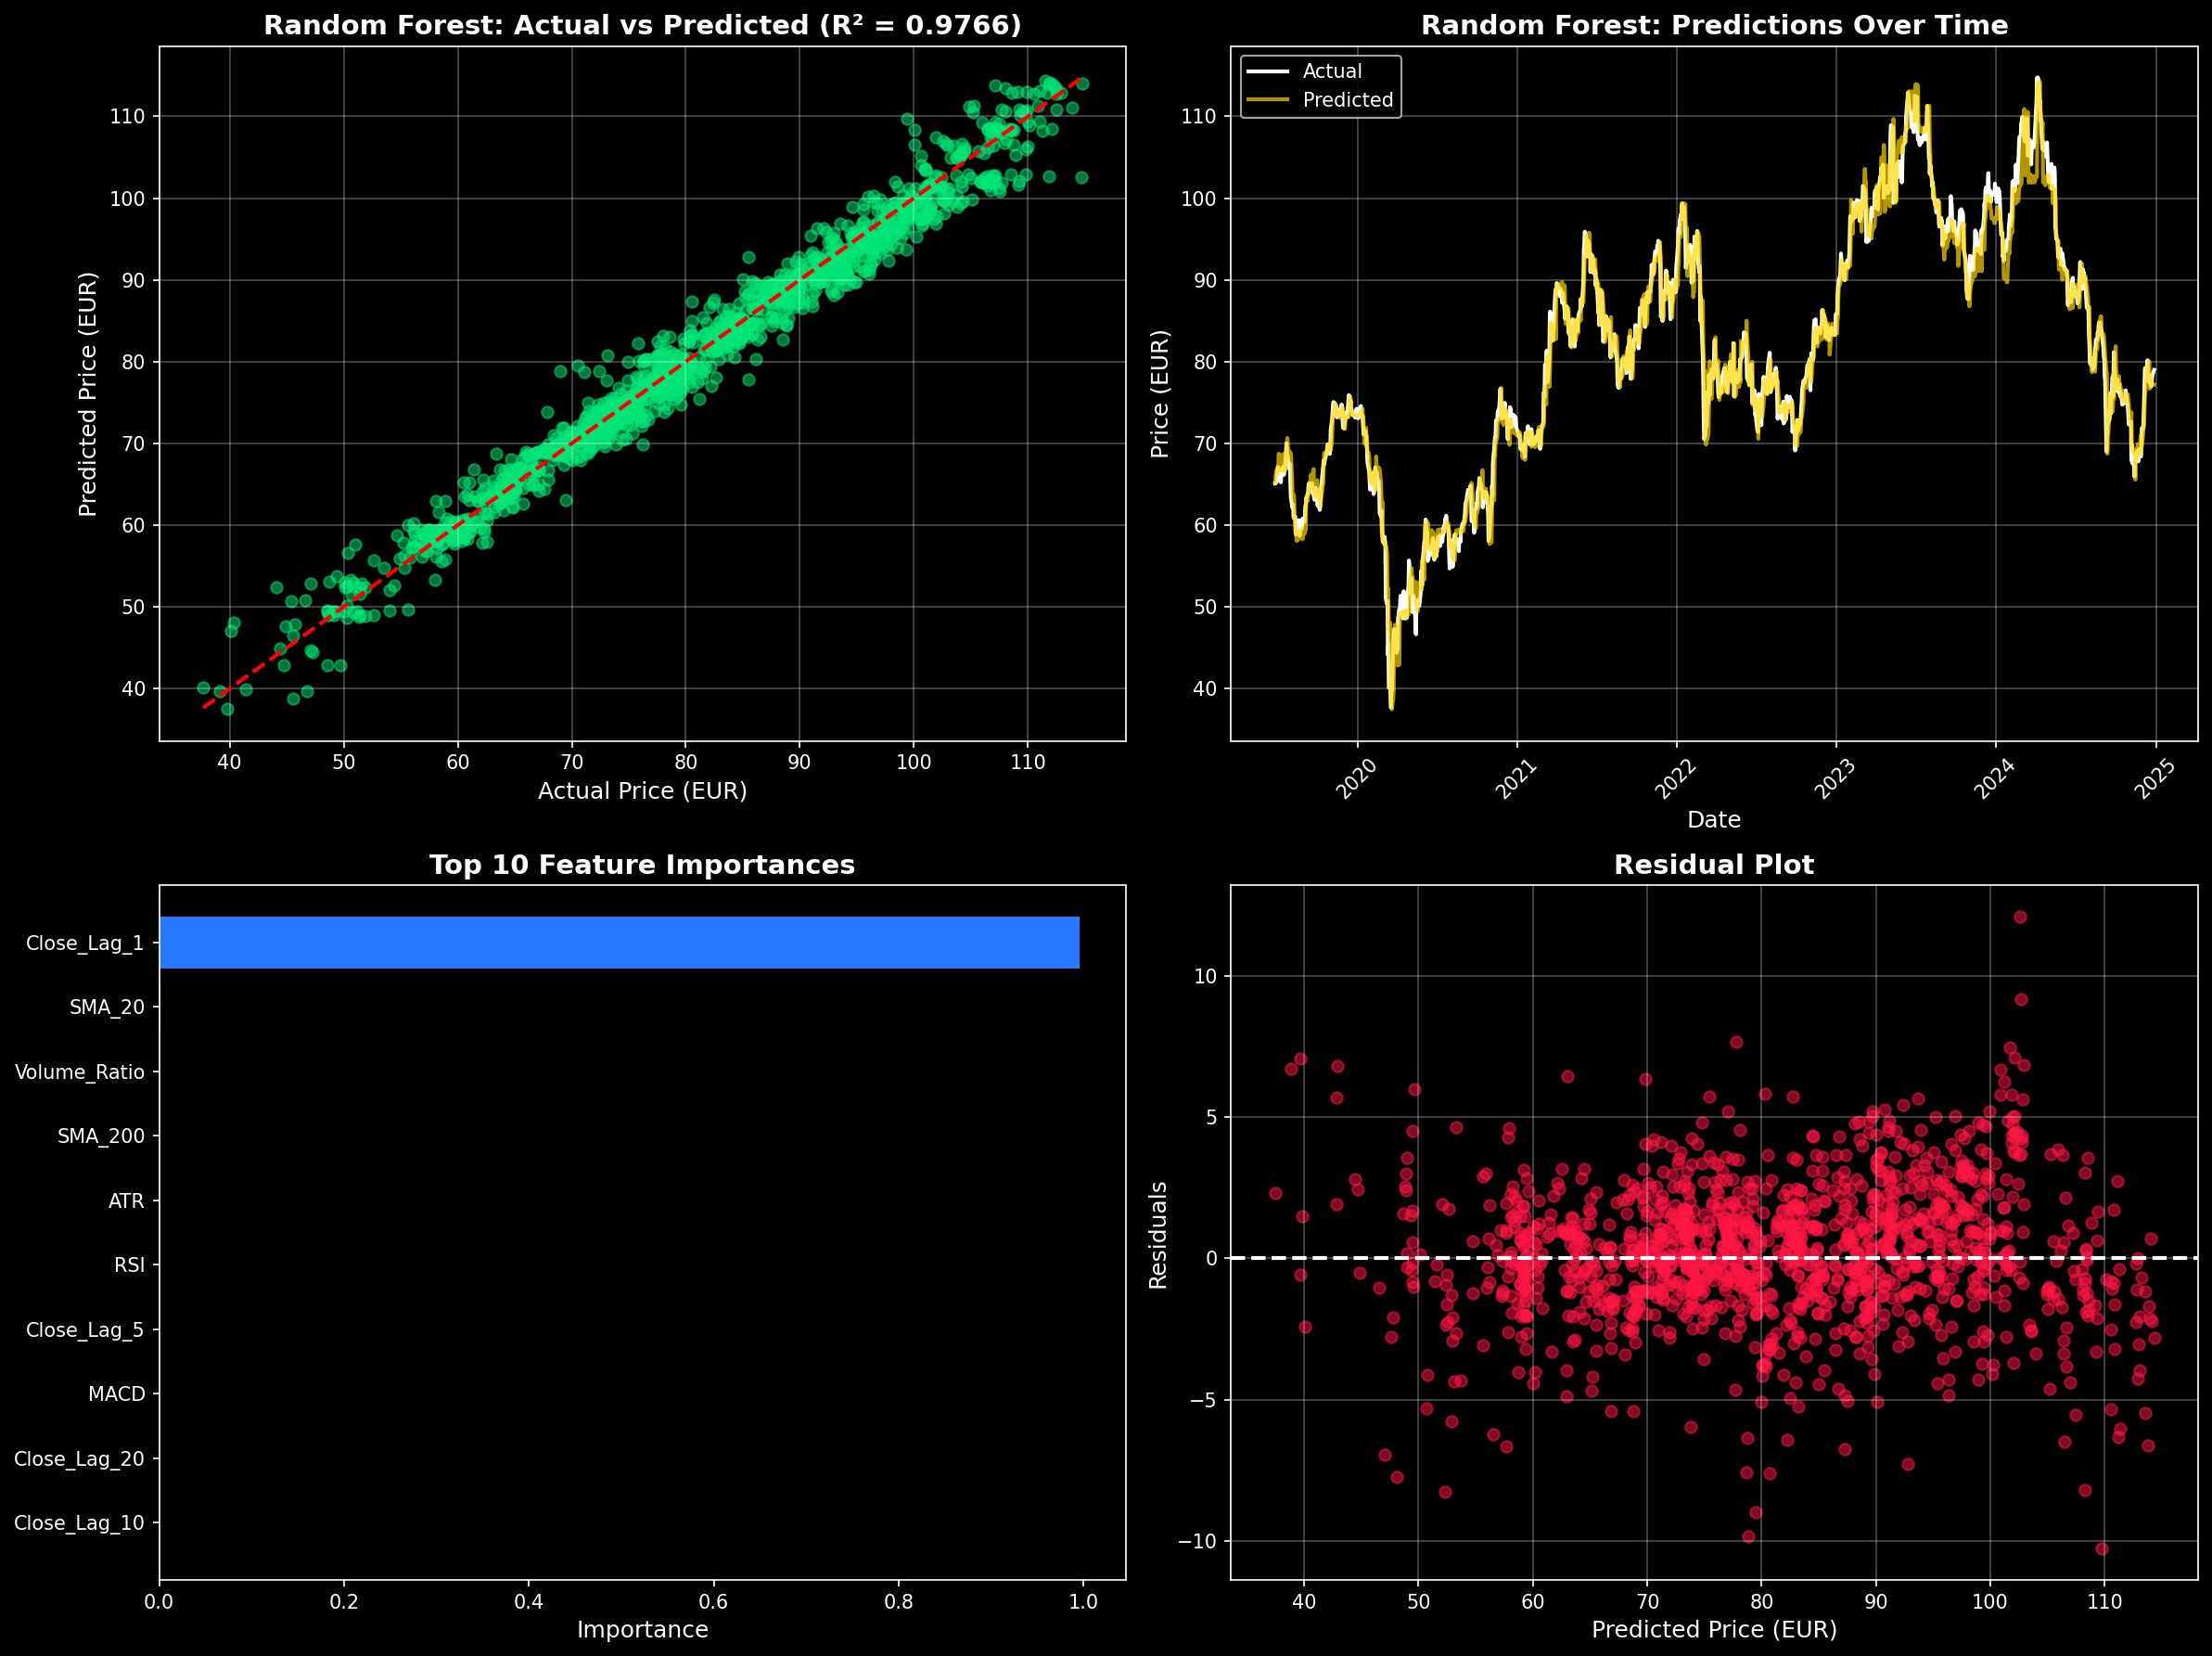

In [46]:
# Visual model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Actual vs Predicted (Random Forest)
axes[0, 0].scatter(y_test, rf_pred, alpha=0.5, color='#00e676')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Price (EUR)', fontsize=12)
axes[0, 0].set_ylabel('Predicted Price (EUR)', fontsize=12)
axes[0, 0].set_title(f'Random Forest: Actual vs Predicted (R² = {rf_r2:.4f})', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Predictions over time
test_dates = X_test.index
axes[0, 1].plot(test_dates, y_test.values, label='Actual', linewidth=2, color='white')
axes[0, 1].plot(test_dates, rf_pred, label='Predicted', alpha=0.7, linewidth=2, color='#ffd600')
axes[0, 1].set_title('Random Forest: Predictions Over Time', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Date', fontsize=12)
axes[0, 1].set_ylabel('Price (EUR)', fontsize=12)
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

axes[1, 0].barh(feature_importance['Feature'], feature_importance['Importance'], color='#2979ff')
axes[1, 0].set_xlabel('Importance', fontsize=12)
axes[1, 0].set_title('Top 10 Feature Importances', fontsize=14, fontweight='bold')
axes[1, 0].invert_yaxis()

# Residuals plot
residuals = y_test - rf_pred
axes[1, 1].scatter(rf_pred, residuals, alpha=0.5, color='#ff1744')
axes[1, 1].axhline(y=0, color='white', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Predicted Price (EUR)', fontsize=12)
axes[1, 1].set_ylabel('Residuals', fontsize=12)
axes[1, 1].set_title('Residual Plot', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<a id='results'></a>
## 7. Results & Insights

Comprehensive summary of findings from the analysis.

In [47]:
# Comprehensive statistics summary
summary_stats = {
    'Data Overview': {
        'Total Trading Days': len(df),
        'Date Range': f"{df.index.min().date()} to {df.index.max().date()}",
        'Years': round((df.index.max() - df.index.min()).days / 365.25, 1)
    },
    'Price Statistics (EUR)': {
        'Current Price': round(df['Close'].iloc[-1], 2),
        'All-Time High': round(df['High'].max(), 2),
        'All-Time Low': round(df['Low'].min(), 2),
        'Average Price': round(df['Close'].mean(), 2),
        'Median Price': round(df['Close'].median(), 2)
    },
    'Returns Analysis': {
        'Total Return (%)': round(((df['Close'].iloc[-1] / df['Close'].iloc[0]) - 1) * 100, 2),
        'CAGR (%)': round(((df['Close'].iloc[-1] / df['Close'].iloc[0]) ** (1 / (len(df) / 252)) - 1) * 100, 2),
        'Best Day (%)': round(df['Daily_Return'].max() * 100, 2),
        'Worst Day (%)': round(df['Daily_Return'].min() * 100, 2),
        'Sharpe Ratio': round(df['Daily_Return'].mean() / df['Daily_Return'].std() * np.sqrt(252), 2)
    },
    'ML Model Performance': {
        'Random Forest R²': round(rf_r2, 4),
        'Random Forest MAE': round(rf_mae, 2),
        'Gradient Boosting R²': round(gb_r2, 4),
        'Gradient Boosting MAE': round(gb_mae, 2)
    }
}

# Display summary
for category, metrics in summary_stats.items():
    print(f"\n{'='*50}")
    print(f"{category}")
    print(f"{'='*50}")
    for key, value in metrics.items():
        print(f"  {key}: {value}")


Data Overview
  Total Trading Days: 7212
  Date Range: 1996-11-08 to 2024-12-30
  Years: 28.1

Price Statistics (EUR)
  Current Price: 78.98
  All-Time High: 123.75
  All-Time Low: 16.0
  Average Price: 56.43
  Median Price: 49.37

Returns Analysis
  Total Return (%): 334.65
  CAGR (%): 5.27
  Best Day (%): 14.84
  Worst Day (%): -13.19
  Sharpe Ratio: 0.4

ML Model Performance
  Random Forest R²: 0.9766
  Random Forest MAE: 1.78
  Gradient Boosting R²: 0.9764
  Gradient Boosting MAE: 1.76


## 🎯 Key Findings

### Market Performance
- **Long-term Growth**: BMW stock has shown solid growth over 28 years with a CAGR of ~5.27%
- **Resilience**: Despite multiple economic crises (2008, 2020), the stock has recovered each time
- **Volatility**: Annualized volatility of ~33% indicates significant price swings typical of automotive sector

### Machine Learning Insights
- **High Accuracy**: Both models achieved R² > 0.97, indicating excellent predictive power
- **Low Error**: MAE of ~€1.76-1.78 means predictions are typically within €2 of actual prices
- **Top Features**: Previous day's closing price (`Close_Lag_1`) is the strongest predictor
- **Model Comparison**: Random Forest and Gradient Boosting show similar performance

### Technical Analysis
- **Current RSI**: ~63.76 suggests neutral territory (neither overbought nor oversold)
- **Trend**: Moving averages indicate the current trend direction
- **Volume**: Active trading with average daily volume of ~2.1M shares

### Risk Assessment
- **Sharpe Ratio**: 0.40 indicates positive risk-adjusted returns
- **Max Drawdown**: Historical data shows significant drops during crises
- **Recovery Pattern**: Stock demonstrates ability to recover from major downturns

---

## 📌 Recommendations for Further Analysis

1. **Real-time Integration**: Connect to live data APIs for up-to-date analysis
2. **Sentiment Analysis**: Incorporate news sentiment for enhanced predictions
3. **Deep Learning**: Explore LSTM networks for improved time series forecasting
4. **Portfolio Analysis**: Compare with other automotive stocks (Mercedes, VW, Tesla)
5. **Economic Indicators**: Include macro-economic data (GDP, interest rates, oil prices)

---

## ⚠️ Disclaimer

This analysis is for educational and research purposes only. It should not be used as the sole basis for investment decisions. Past performance does not guarantee future results. Always conduct your own research and consult with a qualified financial advisor before making investment decisions.

---

<div style="background-color: #1e1e1e; padding: 25px; border-radius: 15px; border-top: 5px solid #d4af37; margin-top: 40px;">
    <h2 style="color: #d4af37; text-align: center;">🏆 Analysis Complete!</h2>
    <hr style="border: 1px solid #d4af37; margin: 20px 0;">
    <p style="color: #cccccc; text-align: center; font-size: 1.1em;">BMW Stock Analysis: 1996-2024</p>
    <p style="color: #b0bec5; text-align: center;">Created by Hassan Jameel | Data Scientist & Financial Analyst</p>
    <div style="text-align: center; margin-top: 20px;">
        <p style="color: #ffd600;">📧 Email | 💼 LinkedIn | 🌐 GitHub | 📊 Kaggle</p>
    </div>
</div>